In [1]:
import sys
sys.path.append("./../../src")
from visualizer_helper import Visualizer

import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import preprocessing
from scipy.sparse import csr_matrix
import scipy
import pickle
import os
from annoy import AnnoyIndex
from scipy.sparse.linalg import inv
import hdbscan

k_neighbors = 100
evecs = 50

A = pickle.load(open("./data/A_mknn_K{}_CSR.p".format(k_neighbors), "rb"))

D = pickle.load(open("./data/D_mknn_K{}_CSR.p".format(k_neighbors), "rb"))
D_mc = pickle.load(open("./data/D_mc_mknn_K{}_CSR.p".format(k_neighbors), "rb"))

D_inv_sqrt = pickle.load(open("./data/D_mknn_inv_sqrt_K{}_CSR.p".format(k_neighbors), "rb"))
D_mc_inv_sqrt = pickle.load(open("./data/D_mc_mknn_inv_sqrt_K{}_CSR.p".format(k_neighbors), "rb"))

L = pickle.load(open("./data/L_mknn_K{}_CSR.p".format(k_neighbors), "rb")).toarray()
L_mc = pickle.load(open("./data/L_mc_mknn_K{}_CSR.p".format(k_neighbors), "rb")).toarray()

L_evals = pickle.load(open("./data/L_evals{}_K{}.p".format(evecs, k_neighbors), "rb"))
L_evecs = pickle.load(open("./data/L_evecs{}_K{}.p".format(evecs, k_neighbors), 'rb'))

L_mc_evals = pickle.load(open("./data/L_mc_evals{}_K{}.p".format(evecs, k_neighbors), "rb"))
L_mc_evecs = pickle.load(open("./data/L_mc_evecs{}_K{}.p".format(evecs, k_neighbors), "rb"))

In [2]:
A.shape

(44083, 44083)

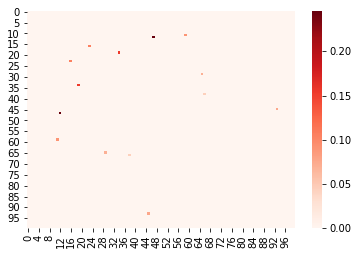

In [3]:
sns.heatmap(A[:100, :100].toarray(), cmap="Reds")

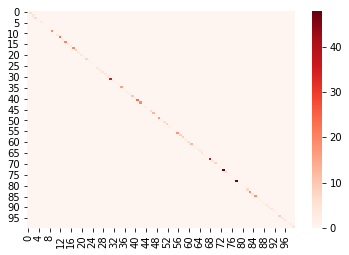

In [4]:
sns.heatmap(D[:100, :100].toarray(), cmap="Reds")

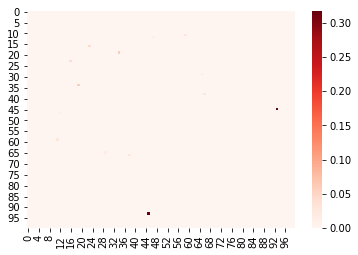

In [5]:
sns.heatmap(L[:100, :100], cmap="Reds")

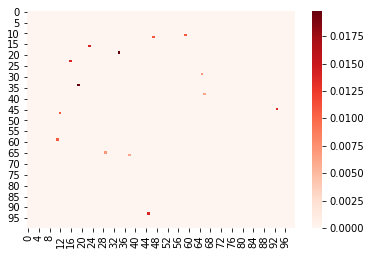

In [6]:
sns.heatmap(L_mc[:100, :100], cmap="Reds")

In [7]:
# L_evals, L_evecs = scipy.sparse.linalg.eigsh(L, k=50, which="LM")
# L_mc_evals, L_mc_evecs = scipy.sparse.linalg.eigsh(L_mc, k=50, which="LM")
# pickle.dump(L_evecs, open("./data/L_evecs50_K{}.p".format(k_neighbors), 'wb'))
# pickle.dump(L_mc_evecs, open("./data/L_mc_evecs50_K{}.p".format(k_neighbors), "wb"))
# pickle.dump(L_evals, open("./data/L_evals50_K{}.p".format(k_neighbors), "wb"))
# pickle.dump(L_mc_evals, open("./data/L_mc_evals50_K{}.p".format(k_neighbors), "wb"))

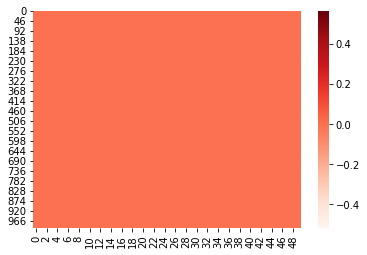

In [9]:
sns.heatmap(L_evecs[:1000, :1000], cmap="Reds")

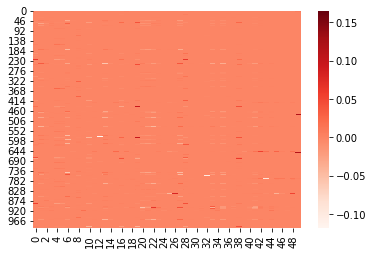

In [11]:
sns.heatmap(L_mc_evecs[:1000, :1000], cmap="Reds")

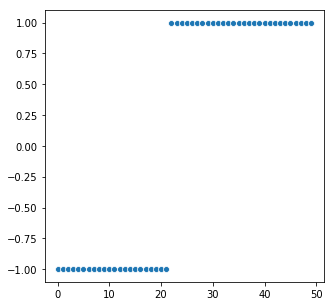

In [12]:
plt.figure(figsize=(5,5))
ax = sns.scatterplot(range(L_evals.shape[0]), L_evals)

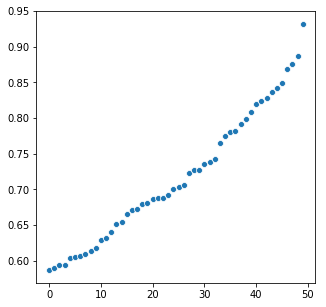

In [13]:
plt.figure(figsize=(5,5))
ax = sns.scatterplot(range(L_evals.shape[0]), L_mc_evals)

In [15]:
evecs_to_plot=20
L_k_evecs = L_evecs[:, -evecs_to_plot:]
L_mc_k_evecs = L_mc_evecs[:, -evecs_to_plot:]

evec_cols = ["Evec_{}".format(i) for i in range(evecs_to_plot)]

L_evec_df = pd.DataFrame(L_k_evecs, columns=evec_cols)
L_mc_evec_df = pd.DataFrame(L_mc_k_evecs, columns=evec_cols)
print(L_evec_df.describe())
print(L_mc_evec_df.describe())

             Evec_0        Evec_1        Evec_2        Evec_3        Evec_4  \
count  44083.000000  44083.000000  44083.000000  44083.000000  44083.000000   
mean       0.000373      0.000205      0.000429     -0.001373      0.000120   
std        0.004748      0.004758      0.004744      0.004561      0.004761   
min       -0.240051     -0.271494     -0.367732     -0.315538     -0.449571   
25%        0.000178      0.000089      0.000232     -0.001653      0.000058   
50%        0.000270      0.000135      0.000353     -0.001101      0.000089   
75%        0.000406      0.000203      0.000530     -0.000725      0.000133   
max        0.415422      0.351184      0.245066      0.284350      0.398216   

             Evec_5        Evec_6        Evec_7        Evec_8        Evec_9  \
count  44083.000000  44083.000000  44083.000000  44083.000000  44083.000000   
mean      -0.001059      0.000048     -0.000903      0.000635     -0.000986   
std        0.004644      0.004763      0.004677    